In [1]:
import pandas as pd 
import numpy as np 
data = pd.read_csv("SMS_train.csv")
data

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will � b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time � finish?,Non-Spam


In [2]:
data.shape

(957, 3)

In [3]:
data.size

2871

In [4]:
data.head

<bound method NDFrame.head of      S. No.                                       Message_body     Label
0         1                         Rofl. Its true to its name  Non-Spam
1         2  The guy did some bitching but I acted like i'd...  Non-Spam
2         3  Pity, * was in mood for that. So...any other s...  Non-Spam
3         4               Will � b going to esplanade fr home?  Non-Spam
4         5  This is the 2nd time we have tried 2 contact u...      Spam
..      ...                                                ...       ...
952     953  hows my favourite person today? r u workin har...  Non-Spam
953     954                      How much you got for cleaning  Non-Spam
954     955  Sorry da. I gone mad so many pending works wha...  Non-Spam
955     956                                 Wat time � finish?  Non-Spam
956     957                    Just glad to be talking to you.  Non-Spam

[957 rows x 3 columns]>

In [7]:
data.tail

<bound method NDFrame.tail of      S. No.                                       Message_body     Label
0         1                         Rofl. Its true to its name  Non-Spam
1         2  The guy did some bitching but I acted like i'd...  Non-Spam
2         3  Pity, * was in mood for that. So...any other s...  Non-Spam
3         4               Will � b going to esplanade fr home?  Non-Spam
4         5  This is the 2nd time we have tried 2 contact u...      Spam
..      ...                                                ...       ...
952     953  hows my favourite person today? r u workin har...  Non-Spam
953     954                      How much you got for cleaning  Non-Spam
954     955  Sorry da. I gone mad so many pending works wha...  Non-Spam
955     956                                 Wat time � finish?  Non-Spam
956     957                    Just glad to be talking to you.  Non-Spam

[957 rows x 3 columns]>

In [8]:
data['Label']

0      Non-Spam
1      Non-Spam
2      Non-Spam
3      Non-Spam
4          Spam
         ...   
952    Non-Spam
953    Non-Spam
954    Non-Spam
955    Non-Spam
956    Non-Spam
Name: Label, Length: 957, dtype: object

In [13]:
data['Label'].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

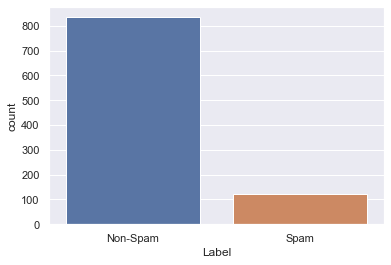

In [14]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("Dataset_for_NLP")
ax = sns.countplot(x="Label", data=data)

In [20]:
non_spam_data = data[data["Label"] == "Non-Spam"]
spam_data  = data[data["Label"] == "Spam"]
print(non_spam_data.shape)
print(spam_data.shape)

(835, 3)
(122, 3)


In [21]:
from sklearn.utils import resample
Spam_upsample = resample(spam_data,
             replace=True,
             n_samples=len(non_spam_data),
             random_state=42)

print(Spam_upsample.shape)

(835, 3)


Non-Spam    835
Spam        835
Name: Label, dtype: int64


<AxesSubplot:xlabel='Label'>

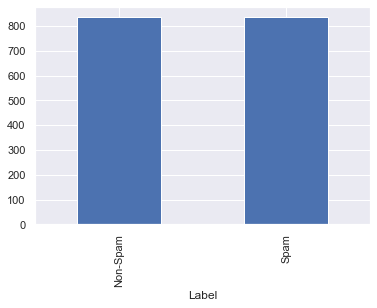

In [25]:
data_upsampled = pd.concat([non_spam_data, Spam_upsample])

print(data_upsampled["Label"].value_counts())

data_upsampled.groupby('Label').size().plot(kind='bar',
                                       y = "Label",
                                       label = "Type")

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_punc']= data['Message_body'].apply(lambda x:remove_punctuation(x))
data

,S. No.,Message_body,Label,clean_punc,msg_lower
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish


In [28]:
data['msg_lower']= data['clean_punc'].apply(lambda x: x.lower())

In [29]:
data

,S. No.,Message_body,Label,clean_punc,msg_lower
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish


In [31]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

In [32]:
data

,S. No.,Message_body,Label,clean_punc,msg_lower,msg_tokenied
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name,[rofl its true to its name]
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,[the guy did some bitching but i acted like id...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,[pity was in mood for that soany other sugges...
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home,[will � b going to esplanade fr home]
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[this is the 2nd time we have tried 2 contact ...
...,...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...,[hows my favourite person today r u workin har...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning,[how much you got for cleaning]
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...,[sorry da i gone mad so many pending works wha...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish,[wat time � finish]


In [33]:
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [35]:
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [36]:
data

,S. No.,Message_body,Label,clean_punc,msg_lower,msg_tokenied,no_stopwords
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name,[rofl its true to its name],[rofl its true to its name]
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other sugges...
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home,[will � b going to esplanade fr home],[will � b going to esplanade fr home]
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...
...,...,...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning,[how much you got for cleaning],[how much you got for cleaning]
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish,[wat time � finish],[wat time � finish]


In [37]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [38]:
def stemming(text):

    stem_text = [porter_stemmer.stem(word) for word in text]
    print(stem_text)
    return stem_text
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))

['rofl its true to its nam']
['the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for fre']
['pity  was in mood for that soany other suggest']
['will � b going to esplanade fr hom']
['this is the 2nd time we have tried 2 contact u u have won the �750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalr']
['reminder from o2 to get 250 pounds free call credit and details of great offers pls reply 2 this text with your valid name house no and postcod']
['huh y lei']
['why dont you wait til at least wednesday to see if you get your ']
['ard 6 like dat lor']
['ok lor sony ericsson salesman i ask shuhui then she say quite gd 2 use so i consid']
['get me out of this dump heap my mom decided to come to lowes bor']
['anything lor juz both of us lor']
['if you arent here in the next  ltgt  hours imma flip my shit']
['sorry ill call lat']
['no i meant the calculation is the same that  ltgt units at  ltg

In [39]:
data

,S. No.,Message_body,Label,clean_punc,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name,[rofl its true to its name],[rofl its true to its name],[rofl its true to its nam]
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other suggest]
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home,[will � b going to esplanade fr home],[will � b going to esplanade fr home],[will � b going to esplanade fr hom]
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...
...,...,...,...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning,[how much you got for cleaning],[how much you got for cleaning],[how much you got for clean]
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish,[wat time � finish],[wat time � finish],[wat time � finish]


In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

In [42]:
data

,S. No.,Message_body,Label,clean_punc,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name,[rofl its true to its name],[rofl its true to its name],[rofl its true to its nam],[rofl its true to its nam]
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other suggest],[pity was in mood for that soany other suggest]
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home,[will � b going to esplanade fr home],[will � b going to esplanade fr home],[will � b going to esplanade fr hom],[will � b going to esplanade fr hom]
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...
...,...,...,...,...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning,[how much you got for cleaning],[how much you got for cleaning],[how much you got for clean],[how much you got for clean]
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish,[wat time � finish],[wat time � finish],[wat time � finish],[wat time � finish]


In [43]:
data['msg_lemmatized'] = data['msg_lemmatized'].str[0]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [45]:
X = vectorizer.fit_transform(data.msg_lemmatized).toarray()

In [46]:
print(vectorizer.get_feature_names())

['0121', '02070836089', '02073162414', '020903', '060505', '061104', '07099833605', '0776xxxxxxx', '078', '07808247860', '07808726822', '0784987', '0800', '08000839402', '08000930705', '08001950382', '08002986906', '08006344447', '0844', '08448350055', '08452810073', '0870', '08701213186', '08701417012', '08701417012150p', '08702840625comuk', '08708034412', '08712101358', '08712300220', '08712405020', '08712460324', '0871277810710pmin', '08714712412', '08715203652', '08715203656', '08715203685', '08715205273', '08715705022', '08717507382', '08717507711', '08717509990', '08718720201', '08718726270', '08718726270150gbpmtmsg18', '087187272008', '08718729758', '08718738001', '08718738002', '08719180219', '08719899229', '09050000332', '09050090044', '09058094507', '09058094583', '09061213237', '09061221061', '09061221066', '09061702893', '09061743386', '09061790121', '09061790126', '09063458130', '09064015307', '09064017295', '09064019014', '09066361921', '09066364311', '09066380611', '0906

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
Labelencoder = LabelEncoder()

In [49]:
data["y"] = Labelencoder.fit_transform(data["Label"])
data

,S. No.,Message_body,Label,clean_punc,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,y
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,rofl its true to its name,[rofl its true to its name],[rofl its true to its name],[rofl its true to its nam],rofl its true to its nam,0
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...,[the guy did some bitching but i acted like id...,the guy did some bitching but i acted like id ...,0
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other sugges...,[pity was in mood for that soany other suggest],pity was in mood for that soany other suggest,0
3,4,Will � b going to esplanade fr home?,Non-Spam,Will � b going to esplanade fr home,will � b going to esplanade fr home,[will � b going to esplanade fr home],[will � b going to esplanade fr home],[will � b going to esplanade fr hom],will � b going to esplanade fr hom,0
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...,[this is the 2nd time we have tried 2 contact ...,this is the 2nd time we have tried 2 contact u...,1
...,...,...,...,...,...,...,...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam,hows my favourite person today r u workin hard...,hows my favourite person today r u workin hard...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...,[hows my favourite person today r u workin har...,hows my favourite person today r u workin hard...,0
953,954,How much you got for cleaning,Non-Spam,How much you got for cleaning,how much you got for cleaning,[how much you got for cleaning],[how much you got for cleaning],[how much you got for clean],how much you got for clean,0
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,Sorry da I gone mad so many pending works what...,sorry da i gone mad so many pending works what...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...,[sorry da i gone mad so many pending works wha...,sorry da i gone mad so many pending works what...,0
955,956,Wat time � finish?,Non-Spam,Wat time � finish,wat time � finish,[wat time � finish],[wat time � finish],[wat time � finish],wat time � finish,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data.y, test_size=0.20, random_state=42)

In [51]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.27306604, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
y_train

302    0
467    0
294    0
548    0
465    0
      ..
106    0
270    0
860    0
435    0
102    1
Name: y, Length: 765, dtype: int32

In [54]:
y_test

835    0
477    0
350    0
890    0
854    0
      ..
462    0
673    0
33     1
31     0
714    0
Name: y, Length: 192, dtype: int32

# Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [57]:
y_pred= classifier.predict(X_test)  

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [60]:
cm

array([[165,   0],
       [ 17,  10]], dtype=int64)

<AxesSubplot:>

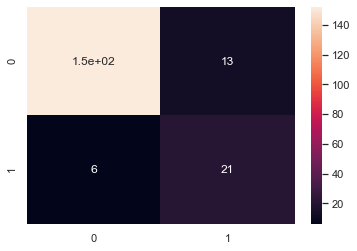

In [91]:
sns.heatmap(cm, annot=True)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       165
           1       1.00      0.37      0.54        27

    accuracy                           0.91       192
   macro avg       0.95      0.69      0.75       192
weighted avg       0.92      0.91      0.89       192



In [67]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6851851851851851

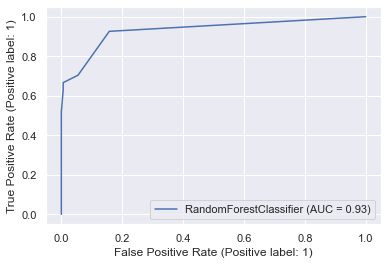

In [68]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test) 

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=42)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=42)

In [73]:
y_pred= classifier.predict(X_test)  

In [74]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [79]:
cm

array([[165,   0],
       [ 22,   5]], dtype=int64)

<AxesSubplot:>

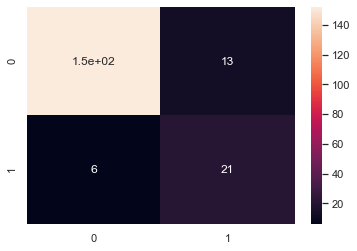

In [92]:
sns.heatmap(cm, annot=True)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       165
           1       1.00      0.19      0.31        27

    accuracy                           0.89       192
   macro avg       0.94      0.59      0.62       192
weighted avg       0.90      0.89      0.85       192



In [154]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

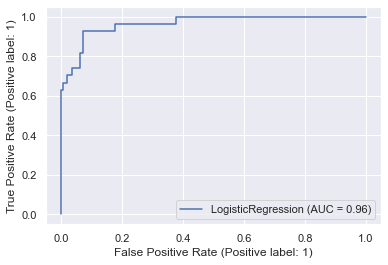

In [81]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test) 

# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [83]:
y_pred = classifier.predict(X_test)  

In [84]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [85]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [86]:
cm

array([[152,  13],
       [  6,  21]], dtype=int64)

<AxesSubplot:>

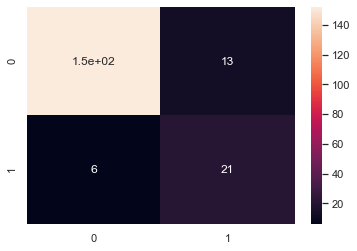

In [93]:
sns.heatmap(cm, annot=True)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       165
           1       0.62      0.78      0.69        27

    accuracy                           0.90       192
   macro avg       0.79      0.85      0.81       192
weighted avg       0.91      0.90      0.91       192



In [155]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

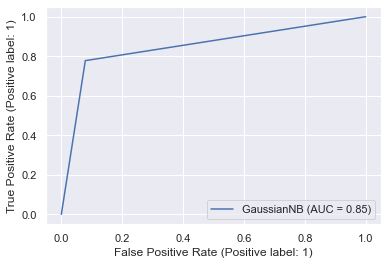

In [88]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test) 

# KNN neighbors

In [105]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [106]:
y_pred= classifier.predict(X_test)  

In [107]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [109]:
cm

array([[164,   1],
       [ 10,  17]], dtype=int64)

<AxesSubplot:>

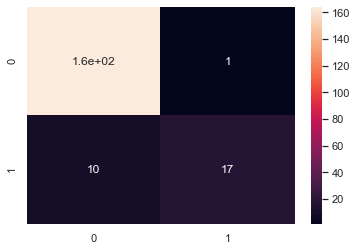

In [110]:
sns.heatmap(cm, annot=True)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       165
           1       0.94      0.63      0.76        27

    accuracy                           0.94       192
   macro avg       0.94      0.81      0.86       192
weighted avg       0.94      0.94      0.94       192



In [156]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

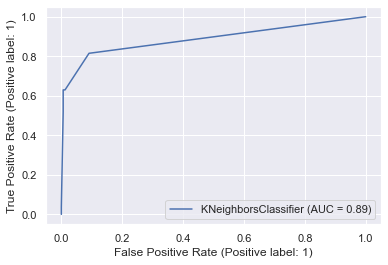

In [112]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)

# Support Vectors Classification 

In [113]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=42)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=42)

In [114]:
y_pred= classifier.predict(X_test)  

In [116]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [118]:
cm


array([[165,   0],
       [ 11,  16]], dtype=int64)

<AxesSubplot:>

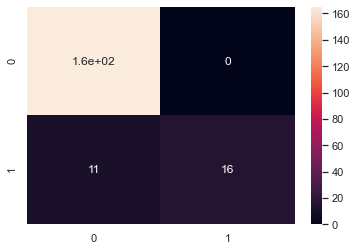

In [119]:
sns.heatmap(cm, annot=True)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       165
           1       1.00      0.59      0.74        27

    accuracy                           0.94       192
   macro avg       0.97      0.80      0.86       192
weighted avg       0.95      0.94      0.94       192



In [157]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

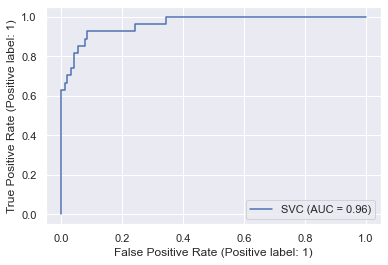

In [121]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)

In [124]:
from sklearn.svm import SVC 
classifier = SVC(kernel='sigmoid', random_state=42)  
classifier.fit(X_train, y_train)  

SVC(kernel='sigmoid', random_state=42)

In [125]:
y_pred= classifier.predict(X_test)  

In [126]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [128]:
cm

array([[165,   0],
       [ 11,  16]], dtype=int64)

<AxesSubplot:>

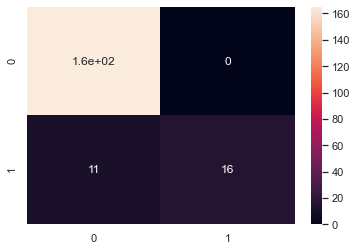

In [129]:
sns.heatmap(cm, annot=True)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       165
           1       1.00      0.59      0.74        27

    accuracy                           0.94       192
   macro avg       0.97      0.80      0.86       192
weighted avg       0.95      0.94      0.94       192



In [158]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

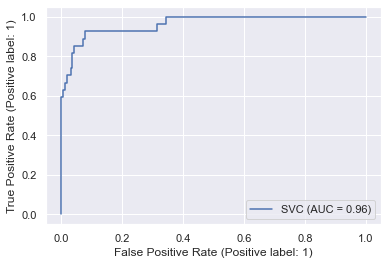

In [131]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)

In [132]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state=42)  
classifier.fit(X_train, y_train)  

SVC(random_state=42)

In [133]:
y_pred= classifier.predict(X_test)  

In [134]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [135]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [136]:
cm

array([[165,   0],
       [ 17,  10]], dtype=int64)

<AxesSubplot:>

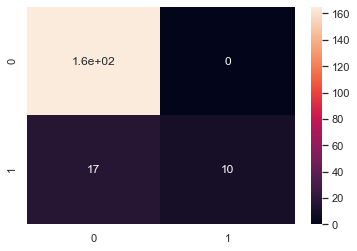

In [137]:
sns.heatmap(cm, annot=True)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       165
           1       1.00      0.37      0.54        27

    accuracy                           0.91       192
   macro avg       0.95      0.69      0.75       192
weighted avg       0.92      0.91      0.89       192



In [159]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

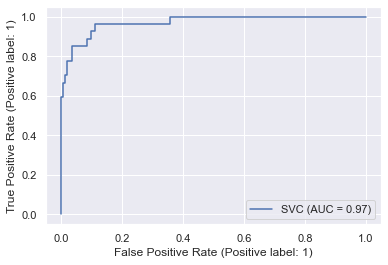

In [144]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)

In [139]:
from sklearn.svm import SVC 
classifier = SVC(kernel='poly', random_state=42)  
classifier.fit(X_train, y_train) 

SVC(kernel='poly', random_state=42)

In [140]:
y_pred= classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[165,   0],
       [ 25,   2]], dtype=int64)

<AxesSubplot:>

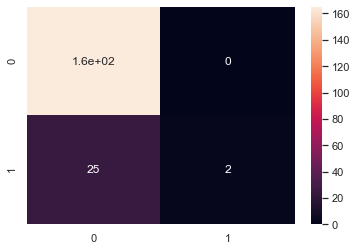

In [142]:
sns.heatmap(cm, annot=True)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       165
           1       1.00      0.07      0.14        27

    accuracy                           0.87       192
   macro avg       0.93      0.54      0.53       192
weighted avg       0.89      0.87      0.82       192



In [160]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

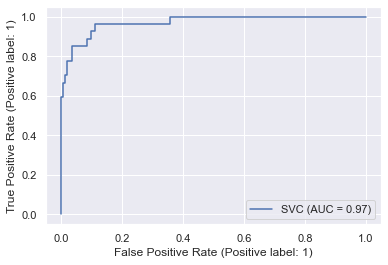

In [145]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)

# Decision Tree 

In [147]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [149]:
y_pred= classifier.predict(X_test)  
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [150]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[162,   3],
       [ 11,  16]], dtype=int64)

<AxesSubplot:>

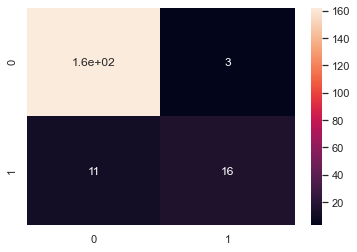

In [151]:
sns.heatmap(cm, annot=True)

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       165
           1       0.84      0.59      0.70        27

    accuracy                           0.93       192
   macro avg       0.89      0.79      0.83       192
weighted avg       0.92      0.93      0.92       192



In [161]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7872053872053871

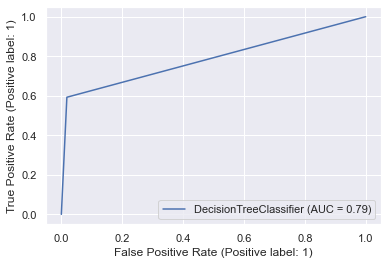

In [153]:
from sklearn import metrics 
metrics.plot_roc_curve(classifier, X_test, y_test)